# Data Exploration - Customer Clustering

## Data Loading and Initial Exploration

In [221]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.metrics import silhouette_score

# setting to show all columns on output
pd.set_option('display.max_columns', 999)

In [222]:
# loading the dataset
df = pd.read_csv("../data/imaginary_customers.csv")
print(df.head(6))

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   
5           6  Female   22              58000                      76   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6  
5         Artist                0            2  


In [223]:
# check for data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB
None


In [224]:
# look at descriptive statistics
df.describe(include='all')

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
count,2000.000000,2000,2000.000000,2000.000000,2000.000000,1965,2000.000000,2000.000000
unique,NaN,2,NaN,NaN,NaN,9,NaN,NaN
top,NaN,Female,NaN,NaN,NaN,Artist,NaN,NaN
freq,NaN,1186,NaN,NaN,NaN,612,NaN,NaN
mean,1000.500000,NaN,48.960000,110731.821500,50.962500,NaN,4.102500,3.768500
std,577.494589,NaN,28.429747,45739.536688,27.934661,NaN,3.922204,1.970749
min,1.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,1.000000
25%,500.750000,NaN,25.000000,74572.000000,28.000000,NaN,1.000000,2.000000
50%,1000.500000,NaN,48.000000,110045.000000,50.000000,NaN,3.000000,4.000000
75%,1500.250000,NaN,73.000000,149092.750000,75.000000,NaN,7.000000,5.000000


In [225]:
# check missing profession values
df[df['Profession'].isna()].head(100)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
79,80,Female,49,98000,42,NaN,1,1
118,119,Female,51,84000,43,NaN,2,7
219,220,Female,59,76000,61,NaN,9,1
237,238,Male,95,36000,35,NaN,0,4
437,438,Male,76,136259,14,NaN,0,7
440,441,Female,0,57373,29,NaN,0,7
498,499,Male,95,121725,3,NaN,12,3
545,546,Female,89,107359,26,NaN,10,6
601,602,Male,61,126370,20,NaN,11,4
641,642,Male,66,121377,19,NaN,7,7


## Data Preparation

In [226]:
# drop missing profession rows and CustomerID column
df = df.dropna(subset=["Profession"]).drop("CustomerID", axis=1)

print(df["Profession"].unique())

['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing']


In [227]:
# encode object columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
df_obj = df[["Gender", "Profession"]]
encoded_cat = encoder.fit_transform(df_obj)

df_encoded = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(), index=df.index)
df_final = pd.concat([df.drop(["Gender", "Profession"], axis=1), df_encoded], axis=1)

# check the data again
print(df_final.info())
print(df_final.head(6))

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1965 non-null   int64  
 1   Annual Income ($)         1965 non-null   int64  
 2   Spending Score (1-100)    1965 non-null   int64  
 3   Work Experience           1965 non-null   int64  
 4   Family Size               1965 non-null   int64  
 5   Gender_Female             1965 non-null   float64
 6   Gender_Male               1965 non-null   float64
 7   Profession_Artist         1965 non-null   float64
 8   Profession_Doctor         1965 non-null   float64
 9   Profession_Engineer       1965 non-null   float64
 10  Profession_Entertainment  1965 non-null   float64
 11  Profession_Executive      1965 non-null   float64
 12  Profession_Healthcare     1965 non-null   float64
 13  Profession_Homemaker      1965 non-null   float64
 14  Profession_La

## Clustering

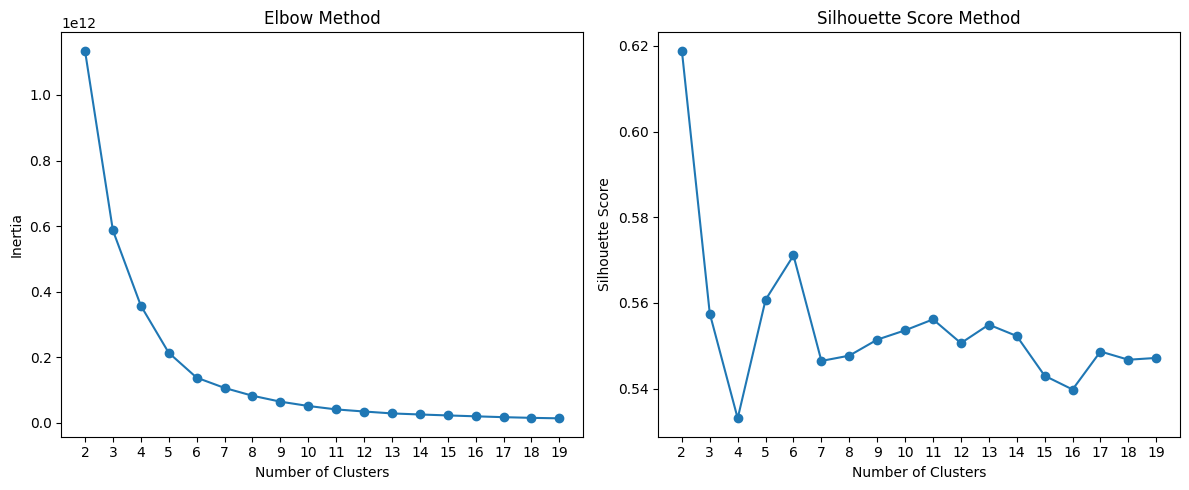

In [228]:
X = df_final.values

# Test different numbers of clusters
cluster_range = range(2, 20)
inertia_values = []
silhouette_scores = []

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plotting the results
plt.figure(figsize=(12, 5))

# visualize inertia values
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1)) 

# visualize silhouette scores
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.tight_layout()
plt.show()

In [229]:
# train KMeans with the optimal number of clusters (6)
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# put the labels into the dataframe
df_clustered = df_final.copy()
df_clustered['Cluster'] = labels


## Visualization

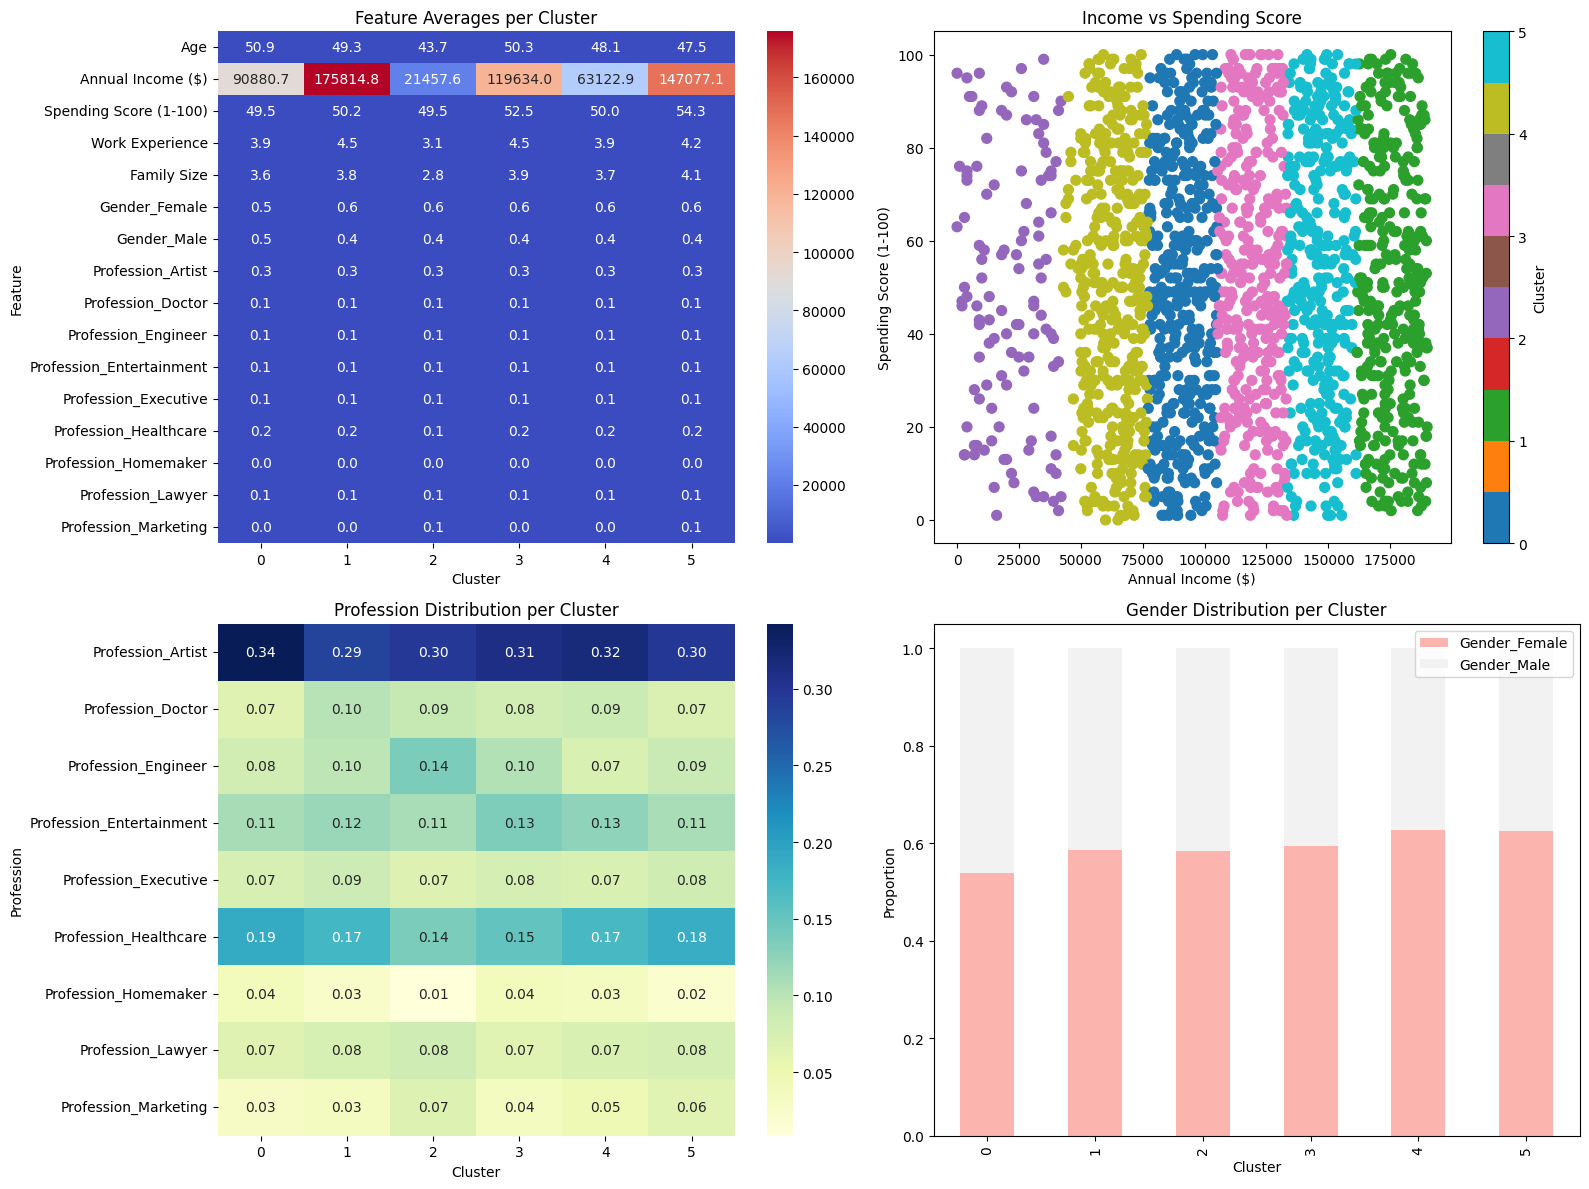

In [230]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Feature Averages
cluster_means = df_clustered.groupby('Cluster').mean()
sns.heatmap(cluster_means.T, annot=True, fmt=".1f", cmap="coolwarm", ax=axs[0, 0])
axs[0, 0].set_title("Feature Averages per Cluster")
axs[0, 0].set_xlabel("Cluster")
axs[0, 0].set_ylabel("Feature")

# Income vs Spending
scatter = axs[0, 1].scatter(df_clustered['Annual Income ($)'], df_clustered['Spending Score (1-100)'],
                            c=df_clustered['Cluster'], cmap='tab10', s=50)
axs[0, 1].set_title("Income vs Spending Score")
axs[0, 1].set_xlabel("Annual Income ($)")
axs[0, 1].set_ylabel("Spending Score (1-100)")
fig.colorbar(scatter, ax=axs[0, 1], label='Cluster')

# Profession Distribution
profession_cols = [col for col in df_final.columns if col.startswith('Profession_')]
profession_summary = df_clustered.groupby('Cluster')[profession_cols].mean()
sns.heatmap(profession_summary.T, annot=True, fmt=".2f", cmap="YlGnBu", ax=axs[1, 0])
axs[1, 0].set_title("Profession Distribution per Cluster")
axs[1, 0].set_xlabel("Cluster")
axs[1, 0].set_ylabel("Profession")

# Gender Distribution
gender_summary = df_clustered.groupby('Cluster')[['Gender_Female', 'Gender_Male']].mean()
gender_summary.plot(kind='bar', stacked=True, colormap='Pastel1', ax=axs[1, 1])
axs[1, 1].set_title("Gender Distribution per Cluster")
axs[1, 1].set_xlabel("Cluster")
axs[1, 1].set_ylabel("Proportion")

plt.tight_layout()
plt.show()
